In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#create PrepDataset.py based on 894_project.py from our github 
import PrepDataset

(13230001, 24)
['level_0', 'level_1', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP', 'SE', 'FS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1', 'Cooler_efficiency', 'Valve_response', 'Pump_leakage', 'Accumulator_pressure', 'Instability_flag']
   level_0  level_1    TS1     TS2    TS3     TS4    VS1      CE     CP  \
0      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
1      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
2      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
3      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   
4      0.0      0.0  35.57  40.961  38.32  30.363  0.604  47.202  2.184   

       SE   FS1     FS2     PS1     PS2    PS3  PS4    PS5    PS6    EPS1  \
0  68.039  8.99  10.179  151.47  125.50  2.305  0.0  9.936  9.818  2411.6   
1  68.039  8.99  10.179  151.45  125.39  2.305  0.0  9.947  9.823  2411.6   
2  68.039  8.99  10.179  151.52  125.40  2.336  0.0  9.964  9.84

In [11]:
from PrepDataset import df,df_profile 

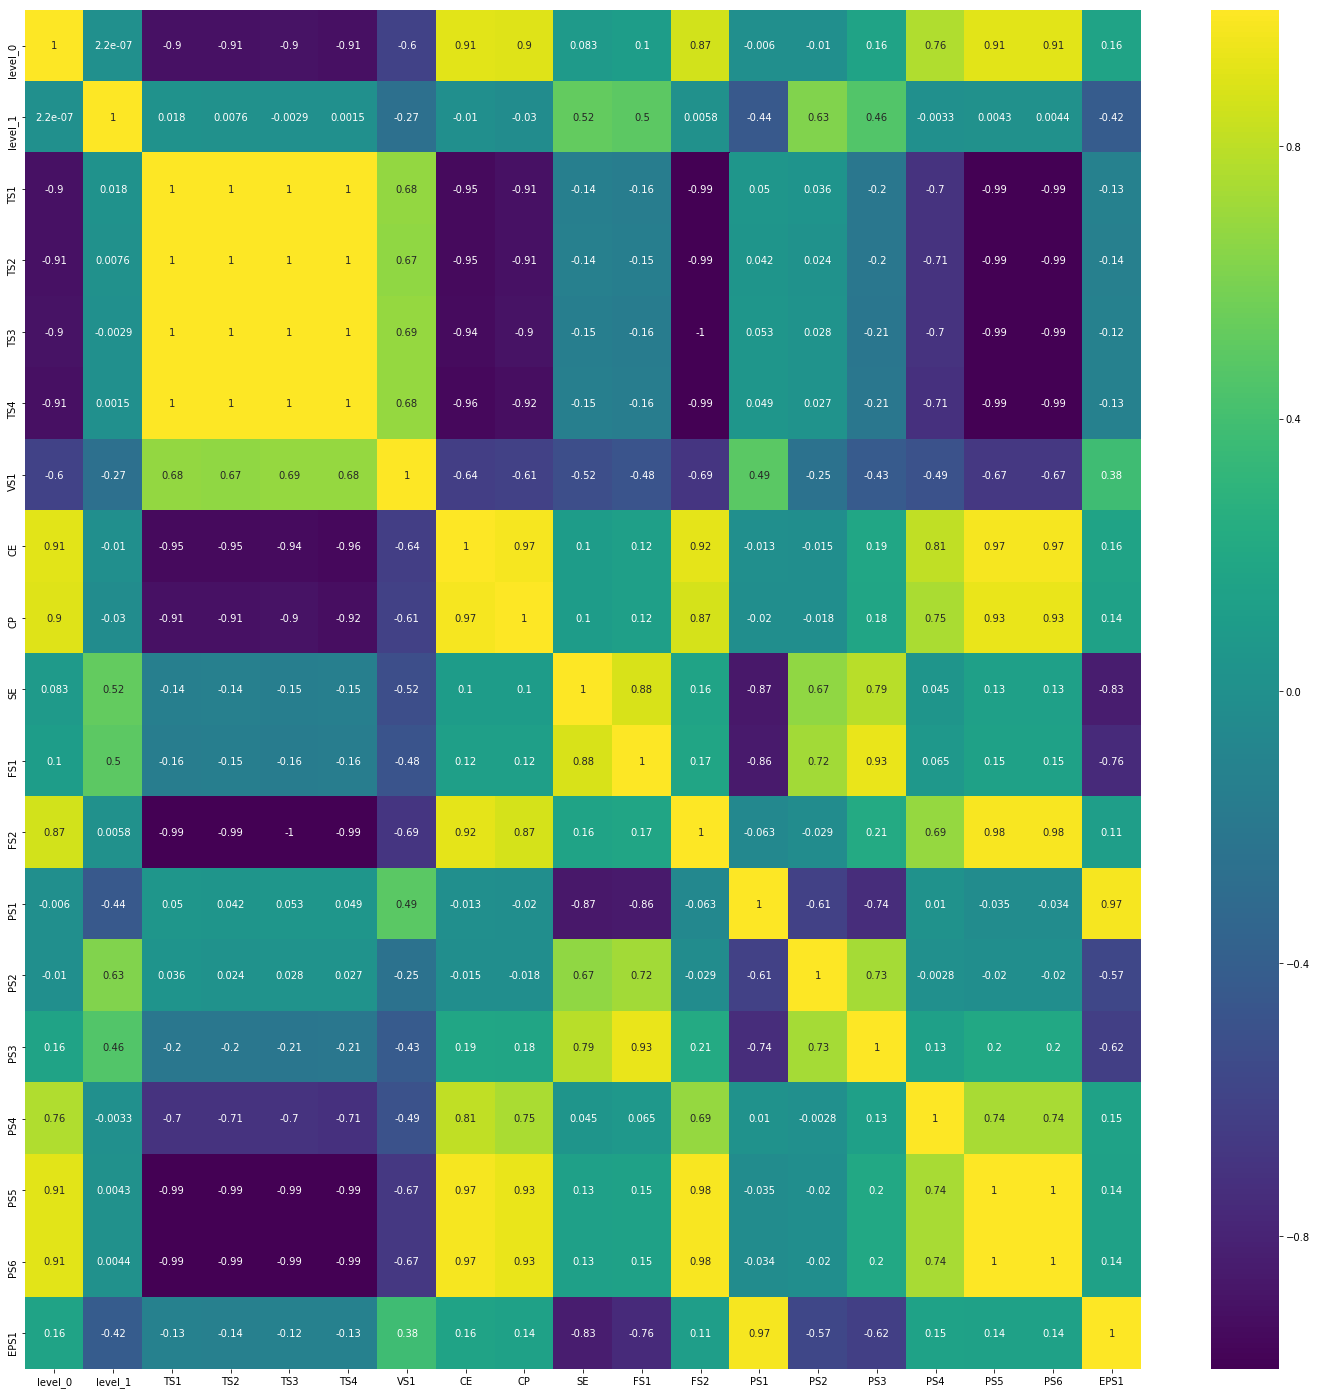

In [14]:
# Create correlation heatmap  
df_corr=df.drop(columns=df_profile.columns)
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_corr.corr(), cmap = 'viridis',annot=True,ax=ax)
plt.show()

In [17]:
#Check for missing values
for key,value in df.items():  
    print('Missing values numbers for {}: '.format(key), value.T.isnull().any().sum())

Missing values numbers for level_0:  0
Missing values numbers for level_1:  0
Missing values numbers for TS1:  0
Missing values numbers for TS2:  0
Missing values numbers for TS3:  0
Missing values numbers for TS4:  0
Missing values numbers for VS1:  0
Missing values numbers for CE:  0
Missing values numbers for CP:  0
Missing values numbers for SE:  0
Missing values numbers for FS1:  0
Missing values numbers for FS2:  0
Missing values numbers for PS1:  0
Missing values numbers for PS2:  0
Missing values numbers for PS3:  0
Missing values numbers for PS4:  0
Missing values numbers for PS5:  0
Missing values numbers for PS6:  0
Missing values numbers for EPS1:  0
Missing values numbers for Cooler_efficiency:  0
Missing values numbers for Valve_response:  0
Missing values numbers for Pump_leakage:  0
Missing values numbers for Accumulator_pressure:  0
Missing values numbers for Instability_flag:  0


<Figure size 432x288 with 0 Axes>

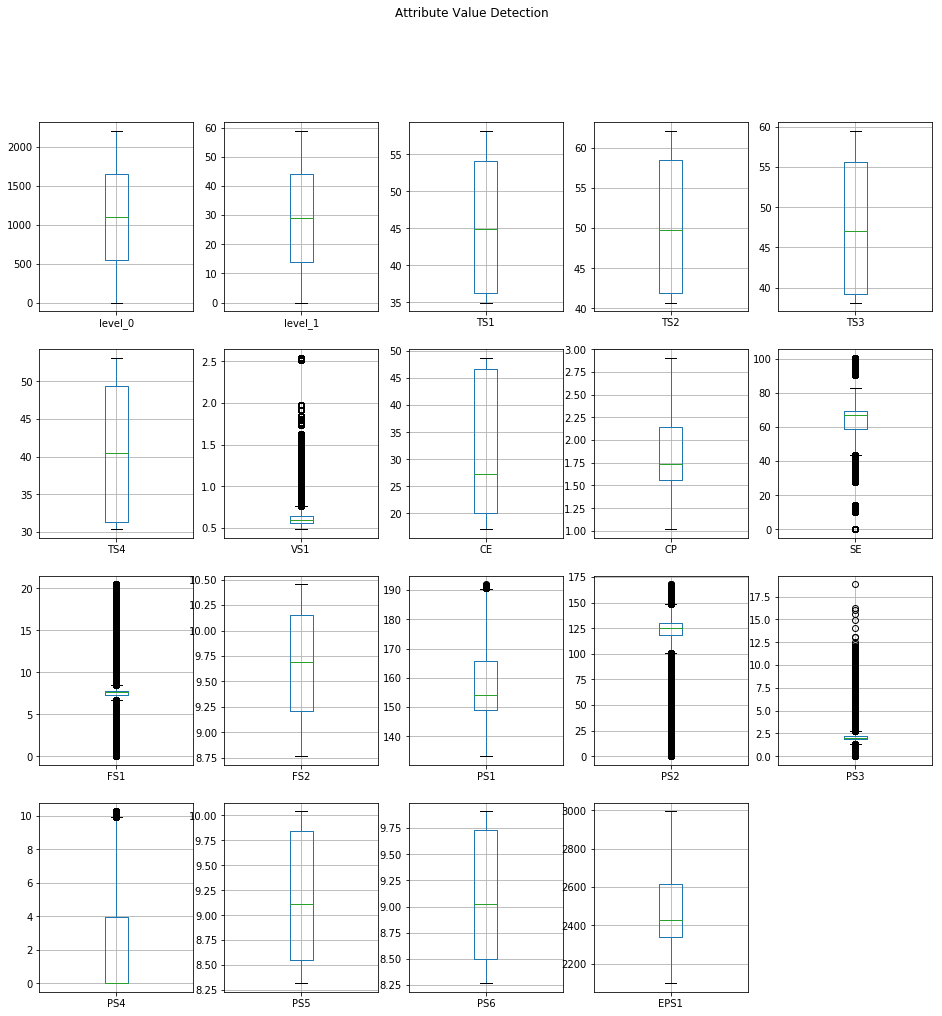

<Figure size 432x288 with 0 Axes>

In [20]:
# Outlier value detection 
df_corr.plot(kind='box', subplots=True, grid=True, title="Attribute Value Detection",layout=(4, 5), sharex=True, sharey=False, legend=True, figsize = (16,16))
plt.figure('tight')

As we obersaved from the above boxplots for each attribute, there are many outliers especially in eps1, ps1,ps2, ps3, ps4, se, and vs1. but since the number of datapoints is small, we chose to keep the outliers 

[  3  20 100]
[100  73  80  90]
[0 2 1]
[130 115 100  90]
[1 0]


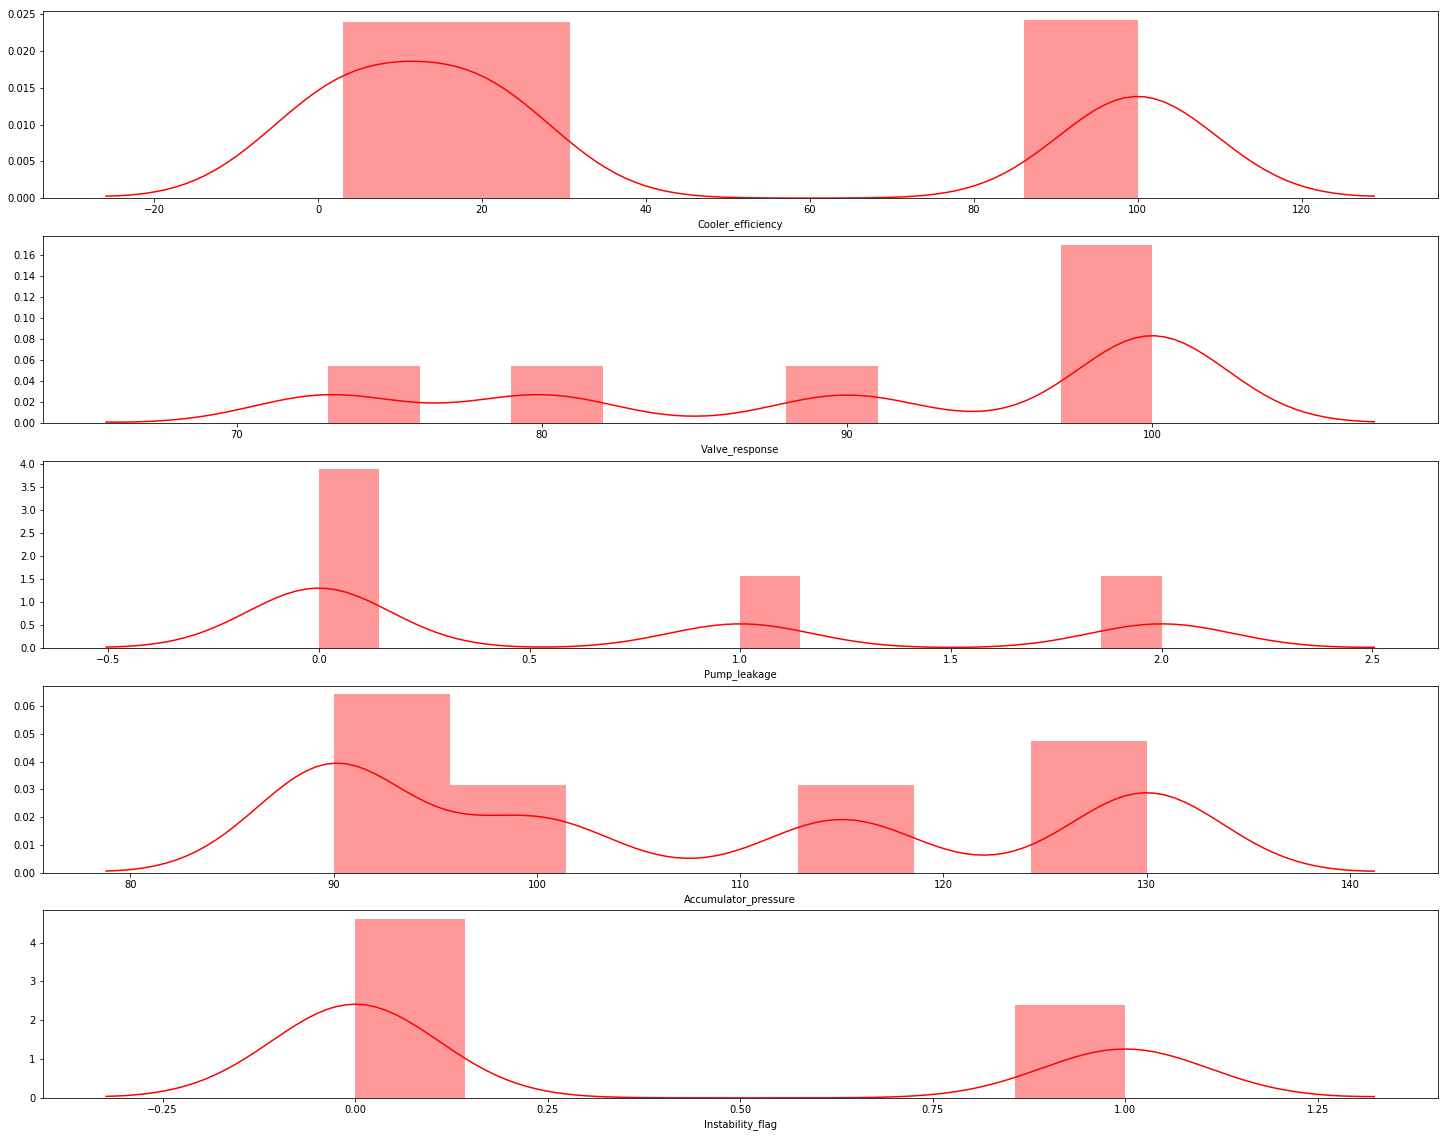

In [4]:
#Visualization of the target variables
for i in enumerate(list(df_profile.columns)):
    print(pd.unique(df_profile[i[1]]))

# Construct 5 subplots for the 5 target variables    
figure,(ax1, ax2,ax3,ax4,ax5) = plt.subplots(figsize=(25, 20 ), 
                       nrows=df_profile.shape[1], ncols=1,sharex = False)
sns.distplot(df_profile['Cooler_efficiency'], hist=True, color = 'red',ax=ax1)
sns.distplot(df_profile['Valve_response'], hist=True,color = 'red',ax=ax2)
sns.distplot(df_profile['Pump_leakage'], hist=True, color = 'red',ax=ax3)
sns.distplot(df_profile['Accumulator_pressure'], hist=True,color = 'red',ax=ax4)
sns.distplot(df_profile['Instability_flag'], hist=True, color = 'red',ax=ax5)

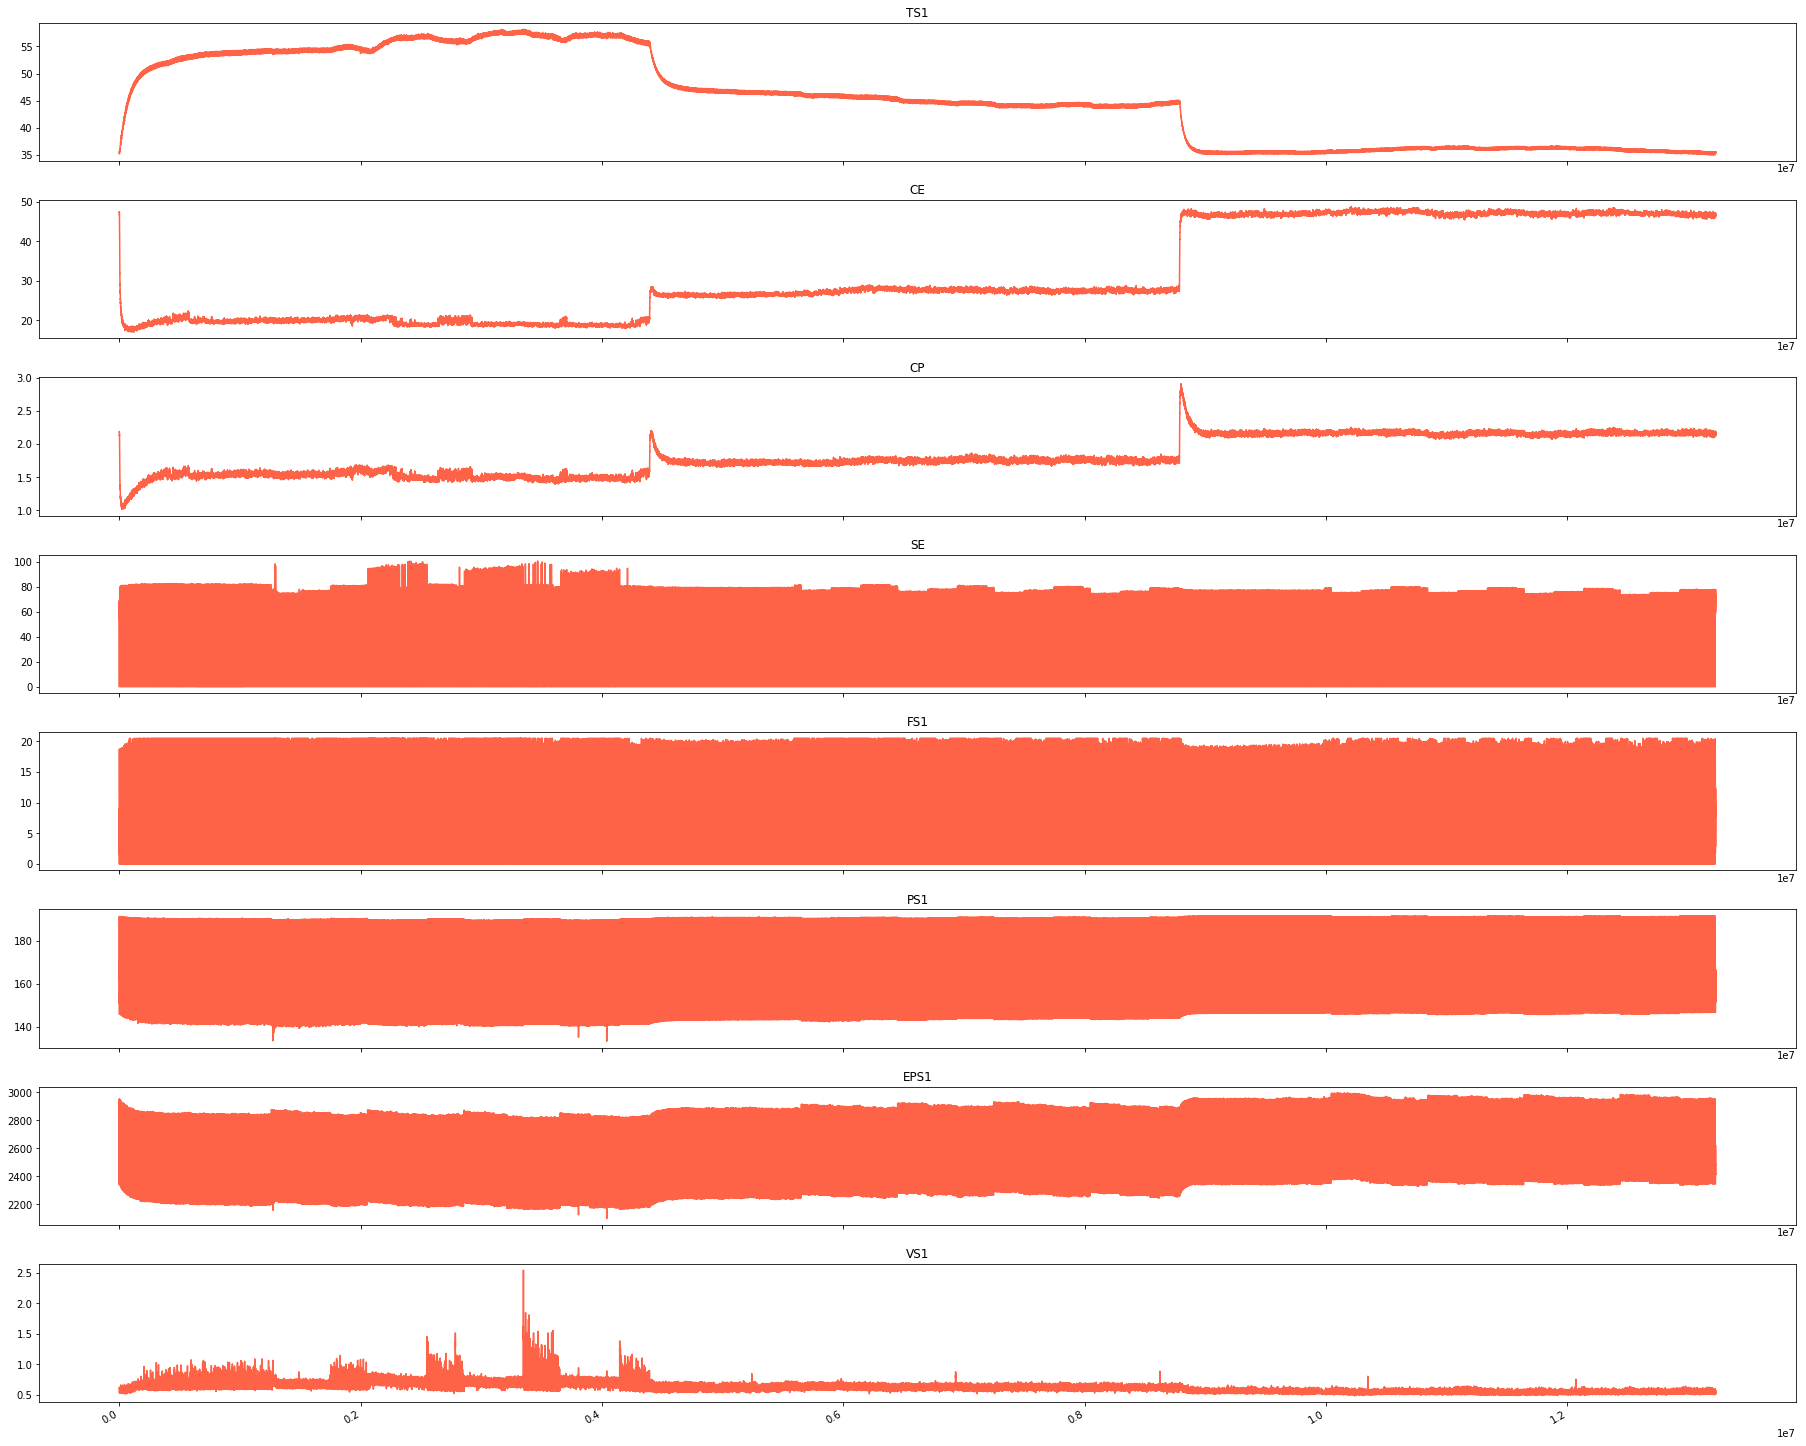

In [81]:
figure,(ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(figsize=(25, 20 ), 
                       nrows=8, ncols=1,sharex = False)
df['TS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax1 ) 
ax1.set_title('TS1')
df['CE'].plot(subplots=True, sharex=True,color='tomato',ax=ax2 ) 
ax2.set_title('CE') 
df['CP'].plot(subplots=True, sharex=True,color='tomato',ax=ax3 ) 
ax3.set_title('CP') 
df['SE'].plot(subplots=True, sharex=True,color='tomato',ax=ax4 ) 
ax4.set_title('SE') 
df['FS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax5 ) 
ax5.set_title('FS1') 
df['PS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax6 ) 
ax6.set_title('PS1') 
df['EPS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax7 ) 
ax7.set_title('EPS1') 
df['VS1'].plot(subplots=True, sharex=True,color='tomato',ax=ax8 ) 
ax8.set_title('VS1') 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [112]:
print(df_profile.columns) 

df_profile['Cooler_efficiency'].describe(),df_profile['Valve_response'].describe(),df_profile['Pump_leakage'].describe(),df_profile['Accumulator_pressure'].describe(),df_profile['Instability_flag'].describe()

Index(['Cooler_efficiency', 'Valve_response', 'Pump_leakage',
       'Accumulator_pressure', 'Instability_flag'],
      dtype='object')


(count    2205.000000
 mean       41.240816
 std        42.383143
 min         3.000000
 25%         3.000000
 50%        20.000000
 75%       100.000000
 max       100.000000
 Name: Cooler_efficiency, dtype: float64, count    2205.000000
 mean       90.693878
 std        10.681802
 min        73.000000
 25%        80.000000
 50%       100.000000
 75%       100.000000
 max       100.000000
 Name: Valve_response, dtype: float64, count    2205.000000
 mean        0.669388
 std         0.817233
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max         2.000000
 Name: Pump_leakage, dtype: float64, count    2205.000000
 mean      107.199546
 std        16.435848
 min        90.000000
 25%        90.000000
 50%       100.000000
 75%       130.000000
 max       130.000000
 Name: Accumulator_pressure, dtype: float64, count    2205.000000
 mean        0.342857
 std         0.474772
 min         0.000000
 25%         0.000000
 50%         0.000000
 75% 

Based on the above results of the 5 different target variables, we should choose a variable relatively evenly distributed - the feature 'Valve_response' with a mean of 90.69, The median of the sample is 100, meaning more than half of the cycles, the valve is in optimal condition.